In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd

# Load the IndoBERT sentiment model and tokenizer
model_name = "cahya/bert-base-indonesian-522M"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize and prepare input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()  # Get the class with the highest score
    return sentiment

# Define sentiment mapping
sentiment_labels = {0: "negative", 1: "neutral", 2: "positive"}

# Load your processed tweets
file_path = "/content/processed_tweets.csv"  # Replace with your file path
data = pd.read_csv(file_path)
processed_tweets = data['processed_tweets'].dropna()

# Predict sentiment for each tweet
data['sentiment'] = processed_tweets.apply(lambda x: sentiment_labels[predict_sentiment(x)])

# View the results
print(data[['processed_tweets', 'sentiment']])

# Save the selected columns to a new CSV file
output_file_path = "/content/sentiment_analysis_output.csv"
data[['processed_tweets', 'sentiment']].to_csv(output_file_path, index=False)

# Print the path to download
print(f"Sentiment analysis results saved to: {output_file_path}")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-522M and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                       processed_tweets sentiment
0     polisi sita rp600 juta dpo tersangka judi onli...   neutral
1     polda metro tangkap dpo judi online libatkan p...  negative
2     laporpakprabowo judi online yg tangkap ekornya...  negative
3     judol donk biar jenderal pembeking dilupakan f...  negative
4     polda metro tangkap 3 dpo judi online komdigi ...   neutral
...                                                 ...       ...
1088   mensesneg arah prabowo mafia akses judol komdigi  negative
1089  komdigi tutup salur telegram ribu langgan afil...  negative
1090     polda metro tangkap sangka judi online komdigi   neutral
1091  komitmen kuat presiden prabowo berantas judi o...   neutral
1092  santai aja kecuali isi otak online nyambung se...   neutral

[1093 rows x 2 columns]
Sentiment analysis results saved to: /content/sentiment_analysis_output.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


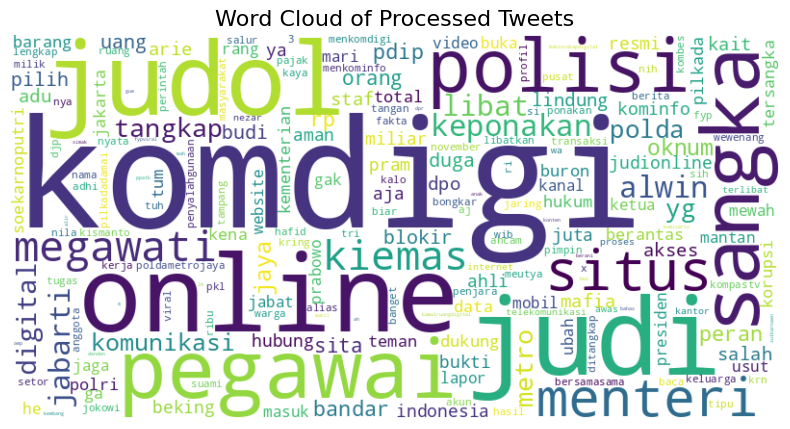

[('komdigi', 1100),
 ('judi', 459),
 ('online', 454),
 ('judol', 432),
 ('pegawai', 271),
 ('sangka', 262),
 ('polisi', 215),
 ('situs', 188),
 ('menteri', 179),
 ('megawati', 174)]

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt_tab')

# Extract the processed_tweet column and drop NaN values
processed_tweets = data['processed_tweets'].dropna()

# Function to clean and tokenize tweets
def tokenize_tweet(text):
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum()]

# Tokenize tweets
tokenized_tweets = processed_tweets.apply(tokenize_tweet)

# Flatten list of all tokens across tweets
all_tokens = [word for tokens in tokenized_tweets for word in tokens]

# Remove common stopwords and punctuation
stop_words = set(stopwords.words('indonesian')) | set(string.punctuation)
filtered_tokens = [word for word in all_tokens if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Tweets', fontsize=16)
plt.show()

# Display the top 10 most common words
top_words = word_counts.most_common(10)
top_words